Author: Fiona Jiaqi Wu \
Date: 04/01/2021

In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Import Datasets

In [3]:
df1 = pd.read_csv('/Users/Fiona/Desktop/Prosper/2019.csv')

In [77]:
df1.head()

,member_key,listing_number,listing_start_date,listing_end_date,listing_creation_date,listing_status,listing_status_reason,listing_amount,amount_funded,amount_remaining,percent_funded,partial_funding_indicator,funding_threshold,prosper_rating,estimated_return,estimated_loss_rate,lender_yield,effective_yield,borrower_rate,borrower_apr,listing_term,listing_monthly_payment,prosper_score,listing_category_id,income_range,income_range_description,stated_monthly_income,employment_status_description,occupation,months_employed,prior_prosper_loans_active,prior_prosper_loans,prior_prosper_loans_principal_borrowed,prior_prosper_loans_principal_outstanding,prior_prosper_loans_cycles_billed,prior_prosper_loans_ontime_payments,prior_prosper_loans_late_cycles,prior_prosper_loans_late_payments_one_month_plus,max_prior_prosper_loan,min_prior_prosper_loan,lender_indicator,group_indicator,channel_code,investment_typeid,investment_type_description,AT01S,AT02S,AT03S,AT06S,AT09S,AT12S,AT20S,AT21S,AT24S,AT25S,AT27S,AT28A,AT28B,AT29S,AT32S,AT34A,AT34B,AT35A,AT35B,AT36S,AT57S,AT101S,AT101B,AU01S,AU02S,AU03S,AU06S,AU09S,AU12S,AU20S,AU21S,AU24S,AU25S,AU27S,AU28S,AU29S,AU32S,AU34S,AU35S,AU36S,AU57S,AU101S,BC01S,BC02S,BC03S,BC06S,BC09S,BC12S,BC20S,BC21S,BC24S,BC25S,BC27S,BC28S,BC29S,BC32S,BC34S,BC35S,BC36S,BC57S,BC101S,BC102S,BC103S,BC106S,BC107S,BC108S,BC110S,CO01S,CO02S,CO03S,CO04S,CO05S,CO06S,CO07S,G001B,G002B,G003S,G020S,G041S,G042S,G043S,G051S,G057S,G058S,G059S,G061S,G063S,G064S,G066S,G068S,G069S,G071S,G093S,G094S,G095S,G099S,G100S,G102S,G103S,G104S,G105S,G209S,G210S,G211S,G212S,G217S,G218B,G218D,G219B,G219D,G220B,G220D,G221B,G221D,G222S,G223S,G225S,G226S,G227S,G228S,G230S,G231S,G232S,G233S,G234S,G235S,G236S,G237S,G238S,G239S,G240S,G241S,G960S,G980S,G990S,HI01S,HI02S,HI03S,HI06S,HI09S,HI12S,HI20S,HI21S,HI24S,HI25S,HI27S,HI28S,HI29S,HI32S,HI34S,HI35S,HI36S,HI57S,HI101S,HR01S,HR02S,HR03S,HR06S,HR09S,HR12S,HR20S,HR21S,HR24S,HR25S,HR27S,HR28S,HR29S,HR32S,HR34S,HR35S,HR36S,HR57S,HR101S,IN01S,IN02S,IN03S,IN06S,IN09S,IN12S,IN20S,IN21S,IN24S,IN25S,IN27S,IN28S,IN29S,IN32S,IN34S,IN35S,IN36S,IN57S,IN101S,MT01S,MT02S,MT03S,MT06S,MT09S,MT12S,MT20S,MT21S,MT24S,MT25S,MT27S,MT28S,MT29S,MT32S,MT34S,MT34B,MT34C,MT35S,MT36S,MT47S,MT57S,MT101S,OF01S,RE01S,RE02S,RE03S,RE06S,RE09S,RE12S,RE20S,RE21S,RE24S,RE25S,RE27S,RE28S,RE29S,RE32S,RE33S,RE34S,RE35S,RE36S,RE57S,RE101S,RE102S,RT01S,RT02S,RT03S,RT06S,RT09S,RT12S,RT20S,RT21S,RT24S,RT25S,RT27S,RT28S,RT29S,RT32S,RT34S,RT35S,RT36S,RT57S,RT101S,RT201S,S004S,S061S,S062S,S064A,S068A,S071A,ST01S,ST02S,ST03S,ST06S,ST09S,ST12S,ST20S,ST21S,ST24S,ST25S,ST27S,ST28S,ST29S,ST32S,ST34S,ST35S,ST36S,ST45S,ST50S,ST57S,ST99S,ST101S,ATAP01,HIAP01,HRAP01,INAP01,MTAP01,REAP01,S063S,S063A,S207S,S207A,G106S,G099A,S206S,S209S,S204S,G242S,G243S,G244S,CV01,CV04,CV10,CV11,CV12,CV13,CV14,CV15,CV16,CV17,CV18,CV19,CV20,CV21,CV22,CV23,CV24,TUFicoRange,TUFicoDate,dti_wprosper_loan,CoBorrowerApplication
0,C20537292024540481062ED,10712027,2020-01-14,2020-01-14,2019-12-14,6,Completed,27000.0,27000.0,0.0,1.0,False,1.0,B,0.0664,0.0494,0.1174,0.1158,0.1274,0.1636,36,906.36,9.0,1,4,"$50,000-74,999",5560.0000,Employed,Civil Service,120.0,0,2,18000.0,0.00,3.0,3.0,0.0,0.0,15000.0,3000.0,0,False,80000,3,Whole,29.0,10.0,10.0,1.0,2.0,10.0,209.0,6.0,10.0,9.0,8.0,208750.0,42500.0,9.0,83232.0,60.0,63.0,12421.0,3327.0,71.0,0.0,124207.0,26619.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,7.0,3.0,3.0,0.0,0.0,3.0,209.0,30.0,3.0,3.0,3.0,17900.0,3.0,7269.0,96.0,5732.0,71.0,0.0,17197.0,5967.0,5732.0,0.0,3.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,12.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.0,-4.0,-4.0,0.0,-4.0,-4.0,-4.0,-4.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-4.0,0.0,-4.0,-4.0,-1.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,0.0,0.0

In [5]:
df1.shape

(189941, 370)

In [6]:
df2 = pd.read_csv('/Users/Fiona/Desktop/Prosper/2020.csv')

In [7]:
df2.shape

(83747, 377)

In [8]:
df3 = pd.read_csv('/Users/Fiona/Desktop/Prosper/2018.csv')

In [9]:
df1['listing_start_date'] = pd.to_datetime(df1['listing_start_date'])
df1['listing_end_date'] = pd.to_datetime(df1['listing_end_date'])
df1['listing_creation_date'] = pd.to_datetime(df1['listing_creation_date'])
df2['listing_start_date'] = pd.to_datetime(df2['listing_start_date'])
df2['listing_end_date'] = pd.to_datetime(df2['listing_end_date'])
df2['listing_creation_date'] = pd.to_datetime(df2['listing_creation_date'])
df3['listing_start_date'] = pd.to_datetime(df3['listing_start_date'])
df3['listing_end_date'] = pd.to_datetime(df3['listing_end_date'])
df3['listing_creation_date'] = pd.to_datetime(df3['listing_creation_date'])

### Combine datasets (2018, 2019, 2020)

In [10]:
df1 = df1[df1.columns & df2.columns & df3.columns]
df2 = df2[df1.columns & df2.columns & df3.columns]
df3 = df3[df1.columns & df2.columns & df3.columns]

In [11]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df1.shape[0] + df2.shape[0] + df3.shape[0])

(189941, 368)
(83747, 368)
(227524, 368)
501212


In [12]:
combined = pd.concat([df1, df2, df3], ignore_index=True)

In [13]:
combined.shape

(501212, 368)

### Data Cleaning (dealing with NaN values)

In [14]:
combined = combined.loc[combined['AT01S'].isnull() == False]
combined = combined.loc[combined['RT35S'].isnull() == False]
combined.shape

(500367, 368)

In [15]:
#fill missing prosper scores with its median
prosper_median = combined['prosper_score'].median()
combined['prosper_score'] = combined['prosper_score'].fillna(prosper_median)

In [16]:
#replace the missing values in occupation with the second most common value - professional (the most common one is Other)
combined['occupation'] = combined['occupation'].fillna('Professional')

In [18]:
#fill missing values in months employed with its median
employed_median = combined['months_employed'].median()
combined['months_employed'] = combined['months_employed'].fillna(employed_median)

In [19]:
combined = combined.fillna(0)

In [20]:
#convert percent_funded to % style
combined['percent_funded'] = combined['percent_funded']*100

### Prosper rating 
Prosper Ratings allow potential investors to easily consider a loan application's level of risk because the rating represents an estimated average annualized loss rate range to the investor. 

AA  0.00-1.99% = 6\
A	2.00–3.99% = 5\
B	4.00–5.99% = 4 \
C	6.00–8.99% = 3 \
D	9.00–11.99% = 2\
E	12.00–14.99% = 1 \
HR	≥ 15.00% = 0

In [21]:
#examine the number of ratings in each category
combined['prosper_rating'].value_counts()

B     120145
C     116686
A     114527
AA     66705
D      49711
E      24933
HR      7660
Name: prosper_rating, dtype: int64

In [22]:
#convert categorical varaible - prosper rating to numerical ones (to include them in the model)
def rating_nu(x):
    if x == 'AA':
        return 6
    elif x == 'A':
        return 5
    elif x == 'B':
        return 4
    elif x == 'C':
        return 3 
    elif x == 'D':
        return 2
    elif x == 'E':
        return 1
    elif x == 'HR':
        return 0
    
combined['prosper_rating_nu'] = combined['prosper_rating'].apply(lambda x: rating_nu(x))

### FICO score

In [24]:
#examine the number of individuals in each FICO range
combined['TUFicoRange'].value_counts()

700-719    90163
680-699    86729
720-739    74851
660-679    73824
740-759    52999
640-659    45206
760-779    34106
780-799    23921
800-819    13799
820-850     4769
Name: TUFicoRange, dtype: int64

In [25]:
# convert fico score range to numerical ones, 10 is the highest
def fico_range_nu(x):
    if x == '820-850':
        return 10
    if x == '800-819':
        return 9
    elif x == '780-799':
        return 8
    elif x == '760-779':
        return 7
    elif x == '740-759':
        return 6
    elif x == '720-739':
        return 5
    elif x == '700-719':
        return 4
    elif x == '680-699':
        return 3 
    elif x == '660-679':
        return 2
    elif x == '640-659':
        return 1
    
combined['TUFicoRange_Nu'] = combined['TUFicoRange'].apply(lambda x: fico_range_nu(x))

In [26]:
# convert the rest of the categorical variables into numerical ones
combined['listing_status_reason'] = combined['listing_status_reason'].astype('category')
combined['listing_status_reason_Nu'] = combined['listing_status_reason'].cat.codes
combined['partial_funding_indicator'] = combined['partial_funding_indicator'].astype('category')
combined['partial_funding_indicator_Nu'] = combined['partial_funding_indicator'].cat.codes
combined['employment_status_description'] = combined['employment_status_description'].astype('category')
combined['employment_status_description_Nu'] = combined['employment_status_description'].cat.codes
combined['occupation'] = combined['occupation'].astype('category')
combined['occupation_Nu'] = combined['occupation'].cat.codes
combined['investment_type_description'] = combined['investment_type_description'].astype('category')
combined['investment_type_description_Nu'] = combined['investment_type_description'].cat.codes
combined['CoBorrowerApplication'] = combined['CoBorrowerApplication'].astype('category')
combined['CoBorrowerApplication_Nu'] = combined['CoBorrowerApplication'].cat.codes

In [78]:
#this is the dataset which contains all variables - categorical and numerical ones 
combined.tail()

,member_key,listing_number,listing_start_date,listing_end_date,listing_creation_date,listing_status,listing_status_reason,listing_amount,amount_funded,amount_remaining,percent_funded,partial_funding_indicator,funding_threshold,prosper_rating,estimated_return,estimated_loss_rate,lender_yield,effective_yield,borrower_rate,borrower_apr,listing_term,listing_monthly_payment,prosper_score,listing_category_id,income_range,income_range_description,stated_monthly_income,employment_status_description,occupation,months_employed,prior_prosper_loans_active,prior_prosper_loans,prior_prosper_loans_principal_borrowed,prior_prosper_loans_principal_outstanding,prior_prosper_loans_cycles_billed,prior_prosper_loans_ontime_payments,prior_prosper_loans_late_cycles,prior_prosper_loans_late_payments_one_month_plus,max_prior_prosper_loan,min_prior_prosper_loan,lender_indicator,group_indicator,channel_code,investment_typeid,investment_type_description,AT01S,AT02S,AT03S,AT06S,AT09S,AT12S,AT20S,AT21S,AT24S,AT25S,AT27S,AT28A,AT28B,AT29S,AT32S,AT34A,AT34B,AT35A,AT35B,AT36S,AT57S,AT101S,AT101B,AU01S,AU02S,AU03S,AU06S,AU09S,AU12S,AU20S,AU21S,AU24S,AU25S,AU27S,AU28S,AU29S,AU32S,AU34S,AU35S,AU36S,AU57S,AU101S,BC01S,BC02S,BC03S,BC06S,BC09S,BC12S,BC20S,BC21S,BC24S,BC25S,BC27S,BC28S,BC29S,BC32S,BC34S,BC35S,BC36S,BC57S,BC101S,BC102S,BC103S,BC106S,BC107S,BC108S,BC110S,CO01S,CO02S,CO03S,CO04S,CO05S,CO06S,CO07S,G001B,G002B,G003S,G020S,G041S,G042S,G043S,G051S,G057S,G058S,G059S,G061S,G063S,G064S,G066S,G068S,G069S,G071S,G093S,G094S,G095S,G099S,G100S,G102S,G103S,G104S,G105S,G209S,G210S,G211S,G212S,G217S,G218B,G218D,G219B,G219D,G220B,G220D,G221B,G221D,G222S,G223S,G225S,G226S,G227S,G228S,G230S,G231S,G232S,G233S,G234S,G235S,G236S,G237S,G238S,G239S,G240S,G241S,G960S,G980S,G990S,HI01S,HI02S,HI03S,HI06S,HI09S,HI12S,HI20S,HI21S,HI24S,HI25S,HI27S,HI28S,HI29S,HI32S,HI34S,HI35S,HI36S,HI57S,HI101S,HR01S,HR02S,HR03S,HR06S,HR09S,HR12S,HR20S,HR21S,HR24S,HR25S,HR27S,HR28S,HR29S,HR32S,HR34S,HR35S,HR36S,HR57S,HR101S,IN01S,IN02S,IN03S,IN06S,IN09S,IN12S,IN20S,IN21S,IN24S,IN25S,IN27S,IN28S,IN29S,IN32S,IN34S,IN35S,IN36S,IN57S,IN101S,MT01S,MT02S,MT03S,MT06S,MT09S,MT12S,MT20S,MT21S,MT24S,MT25S,MT27S,MT28S,MT29S,MT32S,MT34S,MT34B,MT34C,MT35S,MT36S,MT47S,MT57S,MT101S,OF01S,RE01S,RE02S,RE03S,RE06S,RE09S,RE12S,RE20S,RE21S,RE24S,RE25S,RE27S,RE28S,RE29S,RE32S,RE33S,RE34S,RE35S,RE36S,RE57S,RE101S,RE102S,RT01S,RT02S,RT03S,RT06S,RT09S,RT12S,RT20S,RT21S,RT24S,RT25S,RT27S,RT28S,RT29S,RT32S,RT34S,RT35S,RT36S,RT57S,RT101S,RT201S,S004S,S061S,S062S,S064A,S068A,S071A,ST01S,ST02S,ST03S,ST06S,ST09S,ST12S,ST20S,ST21S,ST24S,ST25S,ST27S,ST28S,ST29S,ST32S,ST34S,ST35S,ST36S,ST45S,ST50S,ST57S,ST99S,ST101S,ATAP01,HIAP01,HRAP01,INAP01,MTAP01,REAP01,S063S,S063A,S207S,S207A,G106S,G099A,S206S,S209S,S204S,G242S,G243S,G244S,CV01,CV04,CV10,CV11,CV12,CV13,CV14,CV15,CV16,CV17,CV18,CV19,CV20,CV21,CV22,CV23,CV24,TUFicoRange,TUFicoDate,dti_wprosper_loan,CoBorrowerApplication,prosper_rating_nu,TUFicoRange_Nu,listing_status_reason_Nu,partial_funding_indicator_Nu,employment_status_description_Nu,occupation_Nu,investment_type_description_Nu,CoBorrowerApplication_Nu
501207,B7223910992130A2281A,9180509,2019-02-25,2019-02-25 00:00:00,2018-12-30,7,Cancelled,15000.0,15000.0,0.0,100.0,True,0.7,C,0.0849,0.0699,0.1584,0.1548,0.1684,0.2055,36,533.60,4.0,14,4,"$50,000-74,999",5750.0000,Employed,Sales - Commission,28.0,0,0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,False,40000,3,Whole,8.0,8.0,8.0,2.0,6.0,8.0,30.0,1.0,6.0,5.0,2.0,59662.0,59662.0,6.0,20881.0,52.0,52.0,3868.0,3868.0,999.0,0.0,30940.0,30940.0,1.0,1.0,1.0,0.0,0.0,1.0,28.0,28.0,1.0,1.0,1.0,39012.0,1.0,20881.0,54.0,20881.0,999.0,0.0,20881.0,6.0,6.0,6.0,1.0,5.0,6.0,30.0,4.0,5.0,4.0,1.0,17150.0,4.0,7466.0,52.0,1478.0,999.0,0.0,8870.0,2858.0,2218.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.0,-4.0,-4.0,0.0,8.0,8.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1

In [28]:
print(combined.shape)

(500367, 376)


### Dealing with special labels (negative values) and drop unnecessary columns
only get the numerical data to train the model

#### special labels - TransUnion data elements 
-1	No trades this type \
-2	Not verified in time period \
-3	No open trades this type \
-4	No trades on file \
-5	Cannot calculate (required data for calculation is missing)\
-6	No accounts on file \
-7	No trades opened for required time \
999	No detected event for “Months Since” attributes (e.g. at36S=999 means no delinquency information) \


In [32]:
#create a copy of combined, call it combined2 
combined2 = combined.copy()

In [33]:
#use listing_start_date as the sorting method, and drop the irrelevant columns 
combined2 = combined2.drop(['listing_end_date', 'listing_creation_date', 'member_key', 'listing_number'], axis = 1)

In [34]:
#replace all the negative special labels by 0
combined2_num = combined2._get_numeric_data()
combined2_num[combined2_num < 0] = 0

### Try different periods as test data

In [47]:
# test months from Jan 2019 to Feb 2020 (tried from July 2019 to Feb 2020, the in sample accuracy is below 70%, this sample period gives me 80%)
sub1 = combined2.loc[(combined2['listing_start_date'] >= '2019-01-01') & (combined2['listing_start_date'] <= '2020-02-28')]

In [48]:
#only get numerical numbers to train the model
sub1 = sub1.select_dtypes(include=np.number)
print(sub1.shape)

(210100, 360)


In [49]:
sub1.head()

,listing_status,listing_amount,amount_funded,amount_remaining,percent_funded,funding_threshold,estimated_return,estimated_loss_rate,lender_yield,effective_yield,borrower_rate,borrower_apr,listing_term,listing_monthly_payment,prosper_score,listing_category_id,income_range,stated_monthly_income,months_employed,prior_prosper_loans_active,prior_prosper_loans,prior_prosper_loans_principal_borrowed,prior_prosper_loans_principal_outstanding,prior_prosper_loans_cycles_billed,prior_prosper_loans_ontime_payments,prior_prosper_loans_late_cycles,prior_prosper_loans_late_payments_one_month_plus,max_prior_prosper_loan,min_prior_prosper_loan,lender_indicator,channel_code,investment_typeid,AT01S,AT02S,AT03S,AT06S,AT09S,AT12S,AT20S,AT21S,AT24S,AT25S,AT27S,AT28A,AT28B,AT29S,AT32S,AT34A,AT34B,AT35A,AT35B,AT36S,AT57S,AT101S,AT101B,AU01S,AU02S,AU03S,AU06S,AU09S,AU12S,AU20S,AU21S,AU24S,AU25S,AU27S,AU28S,AU29S,AU32S,AU34S,AU35S,AU36S,AU57S,AU101S,BC01S,BC02S,BC03S,BC06S,BC09S,BC12S,BC20S,BC21S,BC24S,BC25S,BC27S,BC28S,BC29S,BC32S,BC34S,BC35S,BC36S,BC57S,BC101S,BC102S,BC103S,BC106S,BC107S,BC108S,BC110S,CO01S,CO02S,CO03S,CO04S,CO05S,CO06S,CO07S,G001B,G002B,G003S,G020S,G041S,G042S,G043S,G051S,G057S,G058S,G059S,G061S,G063S,G064S,G066S,G068S,G069S,G071S,G093S,G094S,G095S,G099S,G100S,G102S,G103S,G104S,G105S,G209S,G210S,G211S,G212S,G217S,G218B,G218D,G219B,G219D,G220B,G220D,G221B,G221D,G222S,G223S,G225S,G226S,G227S,G228S,G230S,G231S,G232S,G233S,G234S,G235S,G236S,G237S,G238S,G239S,G240S,G241S,G960S,G980S,G990S,HI01S,HI02S,HI03S,HI06S,HI09S,HI12S,HI20S,HI21S,HI24S,HI25S,HI27S,HI28S,HI29S,HI32S,HI34S,HI35S,HI36S,HI57S,HI101S,HR01S,HR02S,HR03S,HR06S,HR09S,HR12S,HR20S,HR21S,HR24S,HR25S,HR27S,HR28S,HR29S,HR32S,HR34S,HR35S,HR36S,HR57S,HR101S,IN01S,IN02S,IN03S,IN06S,IN09S,IN12S,IN20S,IN21S,IN24S,IN25S,IN27S,IN28S,IN29S,IN32S,IN34S,IN35S,IN36S,IN57S,IN101S,MT01S,MT02S,MT03S,MT06S,MT09S,MT12S,MT20S,MT21S,MT24S,MT25S,MT27S,MT28S,MT29S,MT32S,MT34S,MT34B,MT34C,MT35S,MT36S,MT47S,MT57S,MT101S,OF01S,RE01S,RE02S,RE03S,RE06S,RE09S,RE12S,RE20S,RE21S,RE24S,RE25S,RE27S,RE28S,RE29S,RE32S,RE33S,RE34S,RE35S,RE36S,RE57S,RE101S,RE102S,RT01S,RT02S,RT03S,RT06S,RT09S,RT12S,RT20S,RT21S,RT24S,RT25S,RT27S,RT28S,RT29S,RT32S,RT34S,RT35S,RT36S,RT57S,RT101S,RT201S,S004S,S061S,S062S,S064A,S068A,S071A,ST01S,ST02S,ST03S,ST06S,ST09S,ST12S,ST20S,ST21S,ST24S,ST25S,ST27S,ST28S,ST29S,ST32S,ST34S,ST35S,ST36S,ST45S,ST50S,ST57S,ST99S,ST101S,ATAP01,HIAP01,HRAP01,INAP01,MTAP01,REAP01,S063S,S063A,S207S,S207A,G106S,G099A,S206S,S209S,S204S,G242S,G243S,G244S,CV01,CV04,CV10,CV11,CV12,CV13,CV14,CV15,CV16,CV17,CV18,CV19,CV20,CV21,CV22,CV23,CV24,dti_wprosper_loan,prosper_rating_nu,TUFicoRange_Nu,listing_status_reason_Nu,partial_funding_indicator_Nu,employment_status_description_Nu,occupation_Nu,investment_type_description_Nu,CoBorrowerApplication_Nu
0,6,27000.0,27000.0,0.0,100.0,1.0,0.0664,0.0494,0.1174,0.1158,0.1274,0.1636,36,906.36,9.0,1,4,5560.0000,120.0,0,2,18000.0,0.00,3.0,3.0,0.0,0.0,15000.0,3000.0,0,80000,3,29.0,10.0,10.0,1.0,2.0,10.0,209.0,6.0,10.0,9.0,8.0,208750.0,42500.0,9.0,83232.0,60.0,63.0,12421.0,3327.0,71.0,0.0,124207.0,26619.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,3.0,3.0,0.0,0.0,3.0,209.0,30.0,3.0,3.0,3.0,17900.0,3.0,7269.0,96.0,5732.0,71.0,0.0,17197.0,5967.0,5732.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,44.0,44.0,1.0,1.0,1.0,15000.0,1.0,14356.0,96.0,14356.0,999.0,0.0,14356.0,15.0,1.0,1.0,0.0,0.0,1.0,98.0,27.0,1.0,1.0,1.0,10100.0,1.0,6397.0,63.0,6397.0,999.0,0.0,6397.0,2.0,1.0,1.0,0.0,0.0,1.0,174.0,112.0,1.0,1.0,1.0,151250.0,1.0,83232.0,55.0,55.0,55.0,83232.0,999.0,0.0,0.0,83232.0,0.0,12.0,8.0,8.0,1.0,2.0,8.0,209

In [50]:
#define X and y
y = sub1['estimated_loss_rate']
X = sub1.drop(['estimated_loss_rate'], axis = 1)

In [51]:
#80% of the data randomly selected to train the model, the rest of 20% is to test the model accuracy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

In [52]:
#in order to use classification method, need to encode the numerical variables to categorical ones
#this convert the normal format of etsimated loss rate to different values as categories, you can not see the normal format of the predicted value. Only the class (which is represented by a number)
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
y_train_encoded = lab_enc.fit_transform(y_train)
y_test_encoded = lab_enc.fit_transform(y_test)

### Random forest

In [53]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, 
                             criterion='entropy') # Use entropy criterion to define feature importance

# fit the model using training data
rfc.fit(X_train, y_train_encoded)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [54]:
y_test_predicted = rfc.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_encoded, y_test_predicted)

0.7903617325083294

#### Note
The in sample accuracy is about 80% using data from 01/01/2019 to 02/28/2020 \
Use 01/01/2019 to 02/28/2020 as the training data and 03/01/2020 to 05/31/2020 as testing data to see the out of sample accuracy

### out of sample test

In [56]:
sub2_train = combined2.loc[(combined2['listing_start_date'] >= '2019-01-01') & (combined2['listing_start_date'] <= '2020-02-28')]
sub2_test = combined2.loc[(combined2['listing_start_date'] >= '2020-03-01') & (combined2['listing_start_date'] <= '2020-05-31')]

In [57]:
sub2_train = sub2_train.select_dtypes(include=np.number)
sub2_test = sub2_test.select_dtypes(include=np.number)
print(sub2_train.shape)
print(sub2_test.shape)

(210100, 360)
(22931, 360)


In [58]:
#define X and y here 
X_train_sub2 = sub2_train.drop(['estimated_loss_rate'], axis = 1)
y_train_sub2 = sub2_train['estimated_loss_rate']
X_test_sub2 = sub2_test.drop(['estimated_loss_rate'], axis = 1)
y_test_sub2 = sub2_test['estimated_loss_rate']

In [59]:
# encode the numerical variables to categorical ones
lab_enc = preprocessing.LabelEncoder()
y_train_sub2_encoded = lab_enc.fit_transform(y_train_sub2)
y_test_sub2_encoded = lab_enc.fit_transform(y_test_sub2)

In [60]:
# random forest 
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, 
                             criterion='entropy') # Use entropy criterion to define feature importance

# Train the classifier
rfc.fit(X_train_sub2, y_train_sub2_encoded)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [61]:
y_test_sub2_hat = rfc.predict(X_test_sub2)

In [76]:
from sklearn.metrics import accuracy_score
print('The out of sample accuracy is:', accuracy_score(y_test_sub2_encoded, y_test_sub2_hat) *100,'%')

The out of sample accuracy is: 18.01055339932842 %


Note: as you can see the out of sample accuracy is very low - you need more data or lower dimensionality \
A Dimensionality Reduction may help

In [ ]:
#tried logsitic and SVM, very slow to run and acurracy is very low - because of the high dimensionality of the dataset
#from sklearn.svm import SVC
#svc = SVC(kernel = 'rbf', gamma = 'auto')
#svc.fit(X_train_sub2, y_train_sub2_encoded)
#y_test_svc_hat = svc.predict(X_test_sub2)
#print('Accuracy Score is {:.5}'.format(accuracy_score(test_y, y_svc)))

### dataset exploration - interesting findings (sub1)

In [63]:
# examine the estimated loss rate for thoese who are not funded at all
zero_fund = sub1.loc[sub1['percent_funded'] == 0]
elr_zero_fund = zero_fund['estimated_loss_rate']
elr_zero_fund.describe()

count    2256.000000
mean        0.055182
std         0.033165
min         0.002700
25%         0.032400
50%         0.049400
75%         0.074900
max         0.177500
Name: estimated_loss_rate, dtype: float64

In [64]:
# examine the estimated loss rate for thoese who are funded 100%
total_fund = sub1.loc[sub1['percent_funded'] == 100]
elr_total_fund = total_fund['estimated_loss_rate']
elr_total_fund.describe()

count    207215.000000
mean          0.057953
std           0.034466
min           0.002700
25%           0.032400
50%           0.052400
75%           0.077400
max           0.177500
Name: estimated_loss_rate, dtype: float64

In [65]:
# examine the estimated loss rate for thoese who are only partially funded
partial_fund = sub1.loc[(sub1['percent_funded'] != 100) & (sub1['percent_funded'] != 0)]
elr_partial_fund = partial_fund['estimated_loss_rate']
elr_partial_fund.describe()

count    629.000000
mean       0.085997
std        0.047754
min        0.002700
25%        0.047400
50%        0.079900
75%        0.122500
max        0.177500
Name: estimated_loss_rate, dtype: float64

### Random Forest Feature selections - may be used for dimensional reduction 

In [67]:
feature_names = X.columns.tolist()

In [68]:
feature_ranks = pd.DataFrame({'feature_names':feature_names,'scores': rfc.feature_importances_}, columns = ['feature_names', 'scores'])

In [69]:
feature_ranks = feature_ranks.sort_values(by = ['scores'], ascending = False)
feature_ranks.set_index('feature_names', inplace = True)

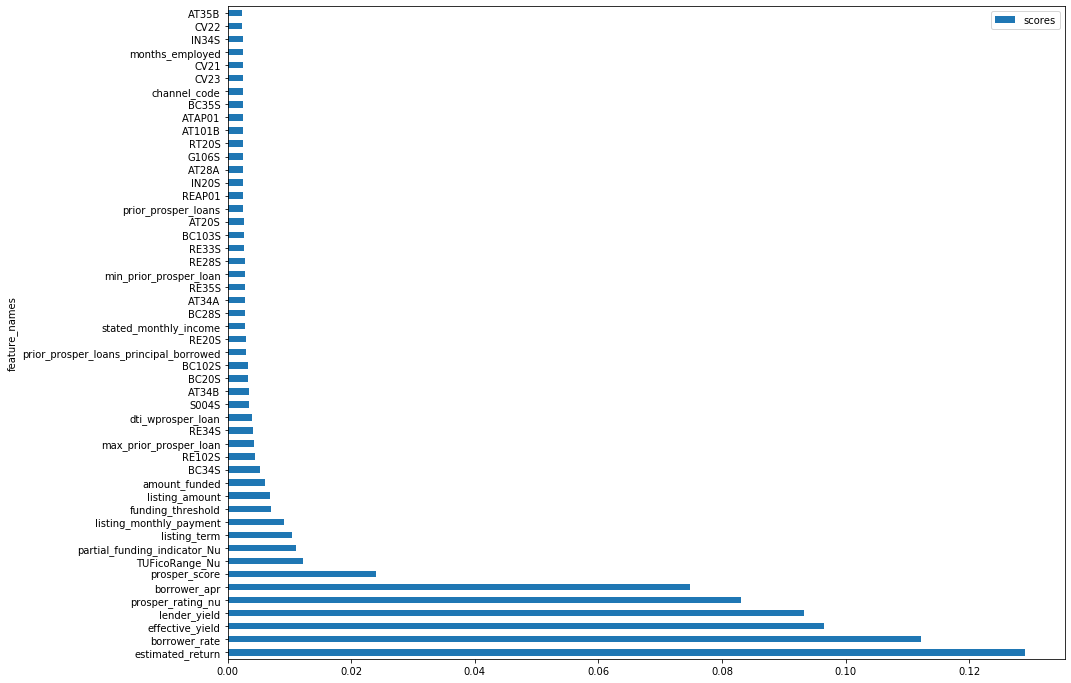

In [72]:
# visualize the top 50 importance features 
import matplotlib.pyplot as plt
feature_ranks.head(50).plot(kind = 'barh', figsize = (15,12))

### Logistic regression - very very slow - not feasible to use when the number of features are so high

In [108]:
#from sklearn.linear_model import LogisticRegression

In [111]:
#lr = LogisticRegression(random_state = 0)

In [ ]:
#lr.fit(X_train, y_train_encoded)

In [ ]:
#y_lr_hat = lr.predict(X_test)
#accuracy_score(y_test_encoded, y_lr_hat)